In [1]:
## Library Imports (Numpy, Matplotlib)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

# Question 1

This question demanded us to study the gradient descent algorithm and implement it's various use-cases as well as compare between it's different flavours. 

In [2]:
def gradient_descent(gradient, init_, learn_rate, n_iter=50, tol=1e-6):
    x = init_
    for _ in range(n_iter):
        delta = -learn_rate * gradient(x)
        if np.all(np.abs(delta) <= tol):
            break
        x += delta
    return round(x*1000)/1000

## Part 1(a)

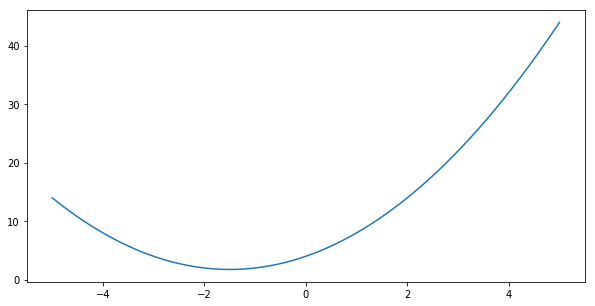

In [3]:
## (i) x^2 + 3x + 4 

## Let's visualise the plot first
x = np.linspace(-5, 5, 1000)
y = x**2 + 3*x + 4

fig = plt.figure(figsize = (10, 5))
plt.plot(x, y)
plt.show()

Gradient descent on $x^2+3x+4$. The derivative of $x^2+3x+4$ is $2x+3$, which is passed as arguement of gradient desecent function. Different pairs of learning_rate, n_iters are tried to see what is the optimal minima.

In [4]:
## Starting gradient descent from x = 1, with learning rate as 0

## Custom gradient function
def gradient1(x):
    return 2*x + 3

## Playing with lr and n_iters
minima1 = gradient_descent(gradient1, 1, 0.01)
minima2 = gradient_descent(gradient1, 1, 0.01, 500)
minima3 = gradient_descent(gradient1, 1, 0.05)
minima4 = gradient_descent(gradient1, 1, 0.05, 500)

print(minima1)
print(minima2)
print(minima3)
print(minima4)

-0.59
-1.5
-1.487
-1.5


We can safely conclude that different initialisations will need different learning rates and number of iterations to find the minima, hence it becomes important to choose them accordingly. However, most of the initial points have converged to local minima i.e. $\frac{-b}{a}$ for the quadratic function which is consistent with our results.

Conclusion : There is one minima at $x = -1.5$

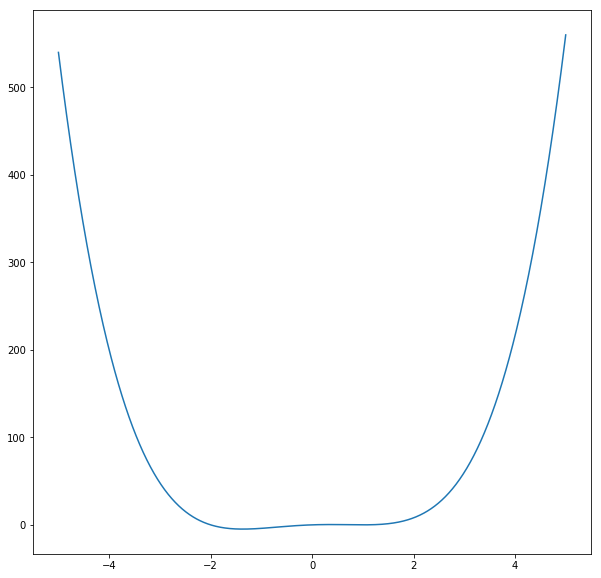

In [5]:
## (ii) x^4 - 3x^2 + 2x

## Visualising the plot 
x = np.linspace(-5, 5, 1000) # since derivative is monotone for ranges beyond +5 and -5
y = x**4 - 3*x*x + 2*x

fig = plt.figure(figsize = (10, 10))
plt.plot(x, y)
plt.show()

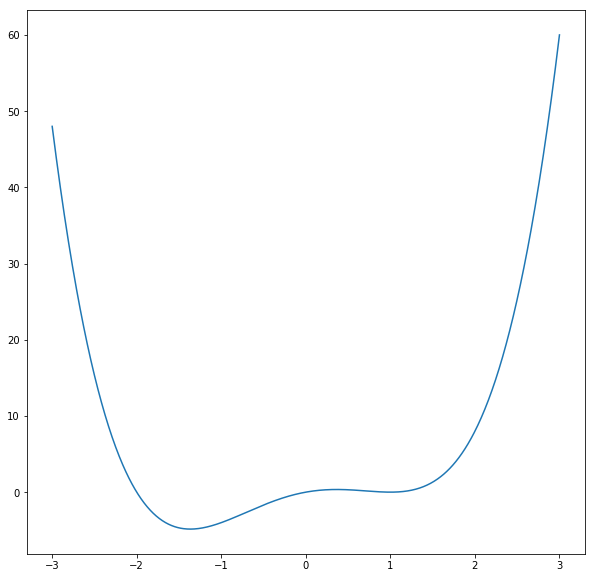

In [6]:
## Magnifying the plot in the range -3, 3

x = np.linspace(-3, 3, 1000)
y = x**4 - 3*x*x + 2*x

fig = plt.figure(figsize = (10, 10))
plt.plot(x, y)
plt.show()

Gradient descent on $x^4-3x^2+2x$. The derivative of $x^4-3x^2+2x$ is $4x^3-6x+2$, which is passed as arguement of gradient desecent function. Learn rate set to 0.001 (a small learn rate because the derivatives are large and this can lead to longer learning or overflow issues) and 100-500 iterations.

In [7]:
## A good starting point for finding global minima maybe -0.5 or -1 (for faster convergence)

def gradient2(x):
    return 4*(x**3) - 6*x + 2

## Playing with lr and n_iters
minima1 = gradient_descent(gradient2, -0.5, 0.001, 100)
minima2 = gradient_descent(gradient2, -0.5, 0.001, 500)
minima3 = gradient_descent(gradient2, -0.5, 0.002, 100)
minima4 = gradient_descent(gradient2, -0.5, 0.002, 500)

print(minima1)
print(minima2)
print(minima3)
print(minima4)

-0.966
-1.365
-1.257
-1.366


Similar to the previous case, we can see that different learning rates
can lead to slower or faster convergence. When increasing the number of iterations all of the minimas are almost same, while they are quite different with less number of iterations. Let's test some more to confirm the minimas.

In [8]:
## We can also find the second local minima, if we start the GD algorithm 
## a number greater than 1

for i in range(10):
    minima = gradient_descent(gradient2, i, 0.001, 1000)
    print(f"Minima for initial value %d is %d" %(i, minima))

Minima for initial value 0 is -1
Minima for initial value 1 is 1
Minima for initial value 2 is 1
Minima for initial value 3 is 1
Minima for initial value 4 is 1
Minima for initial value 5 is 1
Minima for initial value 6 is 1
Minima for initial value 7 is 1
Minima for initial value 8 is 1
Minima for initial value 9 is 1


We can see that 0 gives another minima as compared to 1-9
On checking for x = 1. Derivative at $x = 1$ is $4-6+2 = 0$ (one of the minimas). 

In [9]:
## Looking at the graph, we can also try for negative integers, they
## all should converge to the global minima

for i in range(10):
    minima = gradient_descent(gradient2, -i, 0.001, 1000)
    print(f"Minima for initial value " + str(-i) + " is " + str(minima)) 

Minima for initial value 0 is -1.366
Minima for initial value -1 is -1.366
Minima for initial value -2 is -1.366
Minima for initial value -3 is -1.366
Minima for initial value -4 is -1.366
Minima for initial value -5 is -1.366
Minima for initial value -6 is -1.366
Minima for initial value -7 is -1.366
Minima for initial value -8 is -1.366
Minima for initial value -9 is -1.366


We can see that all of them converge to the same minimum value which is also kind of apparent looking at the graph we have plotted. Existence of any other optima can be denied since the derivative will be a cubic and we can already see the three optimas in the region we have plotted (2 minimas and 1 maxima).   

In [10]:
## Confirming that which of the following is global minima

def foo(x):
    return (x**4 - 3*(x**2) + 2*x)

print(foo(-1.366))
print(foo(1))

-4.848076206064
0


Hence, for this function there are two minimas. A global minima at $x = -1.366$ and a local minima at $x = 1$.

## Part 1(b)

For this part, I have assumed the error to be MSE. Hence the gradient has been computed as follows 

$$L = \frac{1}{n}\sum_{i = 0}^{i = n} (y_{i} - ax_{i} - b)^{2}$$ 

$$\nabla_{a}{L} = \frac{-2}{n}\sum_{i = 0}^{i =n} (y_{i} - ax_{i} - b)(x_{i})$$

$$\nabla_{b}{L} = \frac{-2}{n}\sum_{i = 0}^{i =n} (y_{i} - ax_{i} - b)$$

I will use the above relations to compute the gradient function required.

In [11]:
## Gradient function for y = ax + b

def gradient_gd(Y, X, a, b, tol = 1e-6):
    n = len(X)
    Y_pred = a*X + b ## Stores the predictions
    err = Y - Y_pred
    da = (-2/n) * np.dot(err, X)
    db = (-2/n) * np.sum(err)
    
    return (da, db)

## Part 1(c)

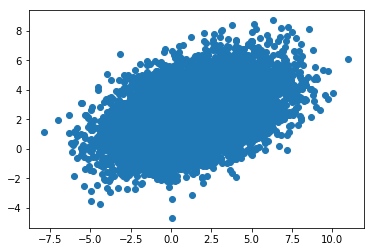

In [12]:
## Generating artificial data 

np.random.seed(0)
X = 2.5 * np.random.randn(10000) + 1.5
res = 1.5 * np.random.randn(10000)
y = 2 + 0.3 * X + res

plt.scatter(X, y)
plt.show()

In [13]:
## Performing Gradient Descent algorithm for the above dataset

import time

## Custom function to compute the MSE Loss
def cost(X, Y, a, b):
    Y_pred = a*X + b
    err = Y - Y_pred
    return(np.square(err).mean())

## Custom function to do the gradient descent algorithm
def my_gradient_descent(X, y, init_, lr, n_iters, tol = 1e-6):
    begin = time.time() # For measuring the time taken to run
    a = init_[0]
    b = init_[1]
    
    for i in range(n_iters):
        
        ## Computing gradient
        (da, db) = gradient_gd(y, X, a, b)
        
        ## Updating the variables
        a = a - lr * da
        b = b - lr * db
        
    end = time.time()
    return (a, b, end - begin)

## Choosing starting parameters: 
## (a, b) can be chosen anything since there is one minima in case of Mean-Squared Error

a = 0 
b = 0

## Trying different sets of lr, n_iters
lr = 0.01
n_iters = 1000

(a, b, dur) = my_gradient_descent(X, y, np.zeros(2), lr, n_iters)
print(a, b, dur)

(a, b, dur) = my_gradient_descent(X, y, np.zeros(2), 0.02, n_iters)
print(a, b, dur)

(a, b, dur) = my_gradient_descent(X, y, np.zeros(2), 0.01, 2000)
print(a, b, dur)

(a, b, dur) = my_gradient_descent(X, y, np.zeros(2), 0.02, 2000)
print(a, b, dur)

(a, b, dur) = my_gradient_descent(X, y, np.zeros(2), 0.05, n_iters)
print(a, b, dur)

0.29531870750081424 2.0232875000170694 0.03853130340576172
0.2953185146083384 2.023288493917519 0.03357815742492676
0.2953185146083576 2.02328849391742 0.06735444068908691
0.2953185146082579 2.023288493917933 0.0692143440246582
0.2953185146082571 2.0232884939179376 0.03640604019165039


0.2964494085187276 2.017461434253602 2.218747043263428


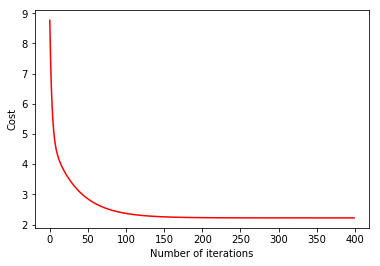

In [15]:
## Plotting the loss function for lr = 0.01 and finding optimal time
## by looking at how many iterations to stop at

def my_gradient_descent_err(X, y, init_, lr, n_iters, tol = 1e-6):
    begin = time.time() # For measuring the time taken to run
    a = init_[0]
    b = init_[1]
    
    ## Stores the error after each iteration
    err_list = [] 
    
    for i in range(n_iters):
        err_list.append(cost(X, y, a, b))
        
        ## Computing gradient
        (da, db) = gradient_gd(y, X, a, b)
        
        ## Updating the variables
        a = a - lr * da
        b = b - lr * db
        
    end = time.time()
    return (a, b, end - begin, err_list)

a, b, _, errors = my_gradient_descent_err(X, y, np.zeros(2), 0.01, 400)
print(a, b, errors[-1])

plt.plot(errors, "r-")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

In [18]:
## Computing the average time taken for lr = 0.01 and 400 iterations over 50 runs

tot_time = 0
for i in range(50):
    a, b, dur = my_gradient_descent(X, y, np.zeros(2), 0.01, 400)
    tot_time = tot_time + dur
    
print("Average time taken: " + str(tot_time/50))

Average time taken: 0.014408531188964844


## Part 1(d)

In [20]:
## Implementing mini-batch gradient descent

def mini_batch_sgd(y, X, init_, lr, n_iters, batch_size = 50):
    
    ## Measuring time taken to run as well
    begin = time.time()
    a = init_[0]
    b = init_[1]
    
    for iter in range(n_iters):
        
        ## Shuffling the initial dataset randomly for making mini-batches
        index_list = np.arange(len(X))
        np.random.shuffle(index_list)
        shuffled_idx = index_list
        
        ## Making the new dataset
        X = X[shuffled_idx].flatten()
        y = y[shuffled_idx].flatten()
        
        ## Making new batches with each batch size equal to provided batch_size
        for i in range(0, X.shape[0], batch_size):
            X_mini = X[i:i+batch_size]
            y_mini = y[i:i+batch_size]
    
            ## Computing gradients for one mini batch
            da, db = gradient_gd(y_mini, X_mini, a, b)
            
            ## Updating the parameters according to the computed gradient
            a = a - lr * da
            b = b - lr * db
        
    end = time.time()
    return (a, b, end - begin)

In [40]:
## Computing the average time taken for lr = 0.01 and 30 iterations for 100 mini-batch size over 50 runs

tot_time = 0
for i in range(50):
    a, b, dur = mini_batch_sgd(y, X, np.zeros(2), 0.01, 30, 100)
    tot_time = tot_time + dur 
    
print("Average time taken by mini-batch gradient descent of size 100: " + str(tot_time/50))

a, b, dur = mini_batch_sgd(y, X, np.zeros(2), 0.01, 30, 100)
print(a, b)

Average time taken by mini-batch gradient descent of size 100: 0.0426830530166626
0.3354571806029025 2.038532749351615


In [55]:
## Computing the average time taken for lr = 0.01 and 20 iterations for 500 mini-batch size over 50 runs

tot_time = 0
for i in range(50):
    a, b, dur = mini_batch_sgd(y, X, np.zeros(2), 0.01, 20, 500)
    tot_time = tot_time + dur 
    
print("Average time taken by mini-batch gradient descent of size 50: " + str(tot_time/50))

a, b, dur = mini_batch_sgd(y, X, np.zeros(2), 0.01, 20, 500)
print(a, b)

Average time taken by mini-batch gradient descent of size 50: 0.008459692001342773
0.29839871785332583 2.017510295037438


In [58]:
## Computing the average time taken for lr = 0.01 and 30 iterations for 1000 mini-batch size over 50 runs

tot_time = 0
for i in range(50):
    a, b, dur = mini_batch_sgd(y, X, np.zeros(2), 0.01, 30, 1000)
    tot_time = tot_time + dur 
    
print("Average time taken by mini-batch gradient descent of size 1000: " + str(tot_time/50))

a, b, dur = mini_batch_sgd(y, X, np.zeros(2), 0.01, 30, 1000)
print(a, b)

Average time taken by mini-batch gradient descent of size 1000: 0.01101323127746582
0.3018561730630826 1.998890495946133


In [59]:
## Computing the average time taken for lr = 0.01 and 1000 iterations for 10000 mini-batch size over 50 runs

tot_time = 0
for i in range(50):
    a, b, dur = mini_batch_sgd(y, X, np.zeros(2), 0.01, 1000, 10000)
    tot_time = tot_time + dur 
    
print("Average time taken by mini-batch gradient descent of size 10000: " + str(tot_time/50))

a, b, dur = mini_batch_sgd(y, X, np.zeros(2), 0.01, 1000, 10000)
print(a, b)

Average time taken by mini-batch gradient descent of size 10000: 0.2934421968460083
0.29531870750081424 2.0232875000170694


In [61]:
## Computing the average time taken for lr = 0.01 and 500 iterations for 5000 mini-batch size over 50 runs

tot_time = 0
for i in range(50):
    a, b, dur = mini_batch_sgd(y, X, np.zeros(2), 0.01, 500, 5000)
    tot_time = tot_time + dur 
    
print("Average time taken by mini-batch gradient descent of size 5000: " + str(tot_time/50))

a, b, dur = mini_batch_sgd(y, X, np.zeros(2), 0.01, 500, 5000)
print(a, b)

Average time taken by mini-batch gradient descent of size 5000: 0.15742798328399657
0.2954828078048845 2.0233037053966876


In [62]:
## Computing the average time taken for lr = 0.01 and 100 iterations for 10 mini-batch size over 50 runs

tot_time = 0
for i in range(50):
    a, b, dur = mini_batch_sgd(y, X, np.zeros(2), 0.01, 100, 10)
    tot_time = tot_time + dur 
    
print("Average time taken by mini-batch gradient descent of size 10: " + str(tot_time/50))

a, b, dur = mini_batch_sgd(y, X, np.zeros(2), 0.01, 100, 10)
print(a, b)

Average time taken by mini-batch gradient descent of size 10: 1.480288062095642
0.32331129933865993 2.053343755791693


In [64]:
## Computing the average time taken for lr = 0.01 and 100 iterations for 50 mini-batch size over 50 runs

tot_time = 0
for i in range(50):
    a, b, dur = mini_batch_sgd(y, X, np.zeros(2), 0.01, 100, 50)
    tot_time = tot_time + dur 
    
print("Average time taken by mini-batch gradient descent of size 50: " + str(tot_time/50))

a, b, dur = mini_batch_sgd(y, X, np.zeros(2), 0.01, 100, 50)
print(a, b)

Average time taken by mini-batch gradient descent of size 50: 0.322496337890625
0.298424069387277 2.0162164422769013


0.3026268181910257 2.0184546139076978 0.009542703628540039 2.2193390815960345


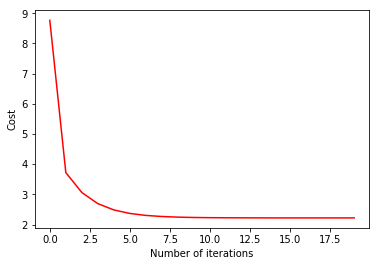

In [66]:
## Obtained best batch size of 500 (based on least time taken),
## let's try to plot the loss curve

def mini_batch_sgd_err(y, X, init_, lr, n_iters, batch_size = 50):
    
    ## Measuring time taken to run as well
    begin = time.time()
    a = init_[0]
    b = init_[1]
    
    ## Stores the list of errors after each iteration
    error_list = []
    
    for iter in range(n_iters):
        error_list.append(cost(X, y, a, b))
        
        ## Shuffling the initial dataset randomly for making mini-batches
        index_list = np.arange(len(X))
        np.random.shuffle(index_list)
        shuffled_idx = index_list
        
        ## Making the new dataset
        X = X[shuffled_idx].flatten()
        y = y[shuffled_idx].flatten()
        
        ## Making new batches with each batch size equal to provided batch_size
        for i in range(0, X.shape[0], batch_size):
            X_mini = X[i:i+batch_size]
            y_mini = y[i:i+batch_size]
    
            ## Computing gradients for one mini batch
            da, db = gradient_gd(y_mini, X_mini, a, b)
            
            ## Updating the parameters according to the computed gradient
            a = a - lr * da
            b = b - lr * db
        
    end = time.time()
    return (a, b, end - begin, error_list)

a, b, dur, errors = mini_batch_sgd_err(y, X, np.zeros(2), 0.01, 20, 500)
print(a, b, dur, errors[-1])

plt.plot(errors, "r-")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

In [68]:
## Computing the average time taken for lr = 0.01 and 20 iterations for 500 mini-batch size over 50 runs

tot_time = 0
for i in range(50):
    a, b, dur = mini_batch_sgd(y, X, np.zeros(2), 0.01, 20, 500)
    tot_time = tot_time + dur 
    
print("Average time taken by best mini-batch gradient descent: " + str(tot_time/50))

Average time taken by best mini-batch gradient descent: 0.008864288330078124


## Part 1(e)

In this part, we were asked to discuss about our findings implementing the different gradient descent algorithms. As can be seen in the code, the normal Gradient Descent took around 0.015 seconds with learning rate = 0.01 on average after stopping at appropriate position when the loss function is no more getting reduced. 

On implementing mini-batch gradient descent algorithm, I observed that taking different batch sizes actually lead to diffrent answers, though the value of cost function varied only slightly, but still they had different optimals, which might be because smaller batch sizes may be oscillating quite a lot and hence not reaching optimal. While working with different mini-batch sizes I found that batch size of 500 was optimal in the sense that, it converged in the least number of iterations and hence took least time amongst all the other batch-sizes. I also found the error at the end of the algorithm which was least for this batch size. On finding the average time taken over 50 iterations, the time was found to be 0.0088 sec.

The results obtained support our hypothesis that mini-batch gradient descent can work in better time than normal Gradient Descent, since computing the Gradient calculation in each iteration of Mini-batch gradient descent was much faster, as size of the dataset is reduced. It was also found that reducing the batch size to quite less is not that economical, since it takes more time to converge. Also, the impact of the shuffling step, played significant effect for smaller batch sizes.

# Question 2

This question was an extension of the problem asked in the Midsem and asked us to compute some of the probabilities. I will complete both the subparts below. 

(a) In this part, we were asked to find the probability of the event that a person has both cold and fever. Let $C$ denote the event that person has a cold and $F$ denote the event that person has a fever. Then using the rules of conditional probability, 

$$P(C, L) = P(F | C) \cdot P(C)$$ 

We also know that $P(C) = 0.02$ and $P(F | C) = 0.307$. Hence

$$P(C, L) = 0.307 \cdot 0.02 = 0.00614$$ 

(b) Let $Co$ denote the event that a person has a cough. In this problem we are asked to find out the probability of the event $C | Co$. Using bayes theorem, we have that 

$$P(C | Co) = \frac{P(Co | C) \cdot P(C)}{P(Co)}$$

We know that $P(C) = 0.02$, let us first calculate the probability of $Co$. Since we are given the conditional probability of the event $Co$ under two events, we will use the law of total probability here and write the following (assuming $L$ denotes the event of having a lung disease)

$$P(Co) = P(Co, C, L) + P(Co, C, \bar{L}) + P(Co, \bar{C}, L), P(Co, \bar{C}, \bar{L})$$

Let's calculate the probability of event $L$ now. Let $S$ denote the event that someone smokes. We are given that $P(S) = 0.2$. Using law of total probability, we have

$$P(L) = P(L, S) + P(L, \bar{S})$$

$$P(L) = P(L|S)\cdot P(S) + P(L|\bar{S}) \cdot P(\bar{S})$$

$$P(L) = (0.1009) \cdot (0.2) + (0.001) \cdot (0.8)$$

$$P(L) = 0.02098$$

Now, we can calculate $P(Co)$ as follows

$$P(Co) = P(Co | C, L) \cdot P(C, L) + P(Co | C, \bar{L}) \cdot P(C, \bar{L}) + P(Co | \bar{C}, L) \cdot P(\bar{C}, L) + P(Co | \bar{C}, \bar{L}) \cdot P(\bar{C}, \bar{L})$$

Now, since $C$ and $L$ are independent, we can separate the probabilities and write

$$P(Co) = (0.7525)\cdot(0.02)\cdot(0.02098) + (0.505)\cdot(0.98)\cdot(0.02098) + (0.505)\cdot(0.02)\cdot(0.97902) + (0.01)\cdot(0.98)\cdot(0.97902)$$

$$P(Co) = 0.03018$$

Now, what's left to calculate is $P(Co | C)$. Using the fact that $C$ and $L$ are independent and using the law of total probability, we can write  

$$P(Co | C) = P(Co | C, L) \cdot P(L) + P(Co | C, \bar{L}) \cdot P(\bar{L})$$

$$P(Co | C) = (0.7525) \cdot (0.02098) + (0.505) \cdot (0.97902)$$ 

$$P(Co | C) = 0.51019$$

Hence, now substituting all of them, we get

$$P(C | Co) = \frac{P(Co | C) \cdot P(C)}{P(Co)}$$

$$P(C | Co) = \frac{0.51019 \cdot 0.02}{0.03018}$$ 

$$P(C | Co) = 0.338$$

# Question 3

In this problem we were asked to derive the MLE estimator for the multinomial k-sided distribution. I have provided the derivation below. 

We will first write the PMF of the multinomial distribution. We will first characterize the distribution in the following way. Consider $n$ items to be put into $k$ bins and probability of $i^{th}$ bin being selected is $p_{i}$. Let $x_{1}, x_{2} \dots x_{n}$ denote the count of items in each bin. Then, we get the PMF of this as follows 

$$f(x_{1}, x_{2} \dots x_{k} | p_{1} \dots p_{k}) = \frac{n!}{\prod x_{i}!} \prod p_{i}^{x_{i}}$$

This characterization is under the implicit constraints that $\sum p_{i} = 1$, $p_{i} \geq 0$ and $\sum x_{i} = n$. 

The negative log-likelihood of the PMF can be written as follows

$$l(p_{1}, p_{2} \dots p_{k} | x_{1} \dots x_{k}) = -log(n!) + \sum_{i = 1}^{k} log(x_{i}!) - \sum_{i = 1}^{k} x_{i}log{p_{i}}$$

Thus, we want to maximise this likelihood under the constraints $\sum p_{i} = 1$, $p_{i} \geq 0$. Thus, on introducing the lagrangian multipliers for these constraints we will get our optimization problem as follows 

$$\mathcal{L} = \min_{p_{i}}\left(\max_{\alpha_{i} \geq 0, \beta} \left(-log(n!) + \sum_{i = 1}^{k} log(x_{i}!) - \sum_{i = 1}^{k} x_{i}log{p_{i}} - \sum_{i = 1}^{k} \alpha_{i}p_{i} + \beta\cdot\left(\sum_{i = 1}^{k}{p_i} - 1\right)\right)\right)$$

We will first transform it into the dual problem and then solve the optimization problem

$$\mathcal{L} = \max_{\alpha_{i} \geq 0, \beta}\left(\min_{p_{i}} \left(-log(n!) + \sum_{i = 1}^{k} log(x_{i}!) - \sum_{i = 1}^{k} x_{i}log{p_{i}} - \sum_{i = 1}^{k} \alpha_{i}p_{i} + \beta\cdot\left(\sum_{i = 1}^{k}{p_i} - 1\right)\right)\right)$$

For solving the inner problem, we will differentiate the function partially wrt $\textbf{p}$ first and then optimise the outer problem. 
On differentiating and equating it to zero with respect to each of the $p_{i}$, we get

$$\frac{-x_{i}}{p_{i}} - \alpha_{i} + \beta = 0$$

$$p_{i} = \frac{x_{i}}{\beta - \alpha_{i}}$$

Putting it back in the original problem, we get

$$\mathcal{L} = \max_{\alpha_{i} \geq 0, \beta}\left(-log(n!) - \sum x_{i} log\left(\frac{x_i}{\beta - \alpha_{i}}\right) - \sum \frac{\alpha_{i}x_{i}}{\beta - \alpha_{i}} + \beta\left(\frac{\sum x_{i}}{\beta - \alpha_{i}} - 1\right)\right)$$

On simplifying and removing constants the problem remains to maximise this 

$$\max_{\alpha_{i} \geq 0, \beta}\left(\sum x_{i} log\left(\frac{x_i}{\beta - \alpha_{i}}\right) - \beta\right)$$

Notice that to maximize the above equation, we need to minimise the value of $\alpha_{i}$s. Hence for all $i$, $\alpha_{i} = 0$. Now, differentiating wrt $\beta$ and setting it to $0$, we get

$$\frac{\sum x_{i}}{\beta} - 1 = 0$$ 

$$\beta = \sum x_{i} = n$$

Hence, after putting it into the above obtained relation, we get that

$$p_{i} = \frac{x_{i}}{\beta - \alpha_{i}} = \frac{x_{i}}{n}$$

This is the MLE estimate obtained for the multinomial k-sided distribution.